# Dataset Overview
Dataset from kaggle https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset

Dataset contains about 1006 images of 503 `Mask` and 503 `Non Mask`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
Data_folder = '/content/drive/MyDrive/Mask Detection/New Masks Dataset'
train_folder = os.path.join(Data_folder, 'Train')
validation_folder = os.path.join(Data_folder, 'Validation')

In [3]:
# Directory with our training mask pictures
train_mask_dir = os.path.join(Data_folder,'Train/Mask')

# Directory with our training non mask pictures
train_nonmask_dir = os.path.join(Data_folder,'Train/Non Mask')

# Directory with our validation mask pictures
validation_mask_dir = os.path.join(Data_folder,'Validation/Mask')

# Directory with our validation non mask pictures
validation_nonmask_dir = os.path.join(Data_folder,'Validation/Non Mask')

In [4]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nonmask_names = os.listdir(train_nonmask_dir)
print(train_nonmask_names[:10])

validation_mask_hames = os.listdir(validation_mask_dir)
print(validation_mask_hames[:10])

validation_nonmask_names = os.listdir(validation_nonmask_dir)
print(validation_nonmask_names[:10])

['2083.jpg', '2085.jpg', '2070.jpg', '2086.jpg', '2072.jpg', '2176.png', '2159.png', '2203.png', '2178.png', '2222.png']
['real_01078.jpg', 'real_01060.jpg', 'real_01074.jpg', 'real_01072.jpg', 'real_01071.jpg', 'real_01032.jpg', 'real_01064.jpg', 'real_01050.jpg', 'real_01034.jpg', 'real_01049.jpg']
['1804.jpg', '1701.jpg', '1841.jpg', '1713.jpg', '1731.jpg', '1829.jpg', '1727.jpg', '1773.jpg', '1848.jpg', '1828.jpg']
['real_00041.jpg', 'real_00994.jpg', 'real_00046.jpg', 'real_00011.jpg', 'real_00027.jpg', 'real_00077.jpg', 'real_00101.jpg', 'real_00082.jpg', 'real_00060.jpg', 'real_00031.jpg']


In [5]:
print('total training mask images:', len(os.listdir(train_mask_dir)))
print('total training non mask images:', len(os.listdir(train_nonmask_dir)))
print('total validation mask images:', len(os.listdir(validation_mask_dir)))
print('total validation non mask images:', len(os.listdir(validation_nonmask_dir)))

total training mask images: 350
total training non mask images: 350
total validation mask images: 153
total validation non mask images: 153


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

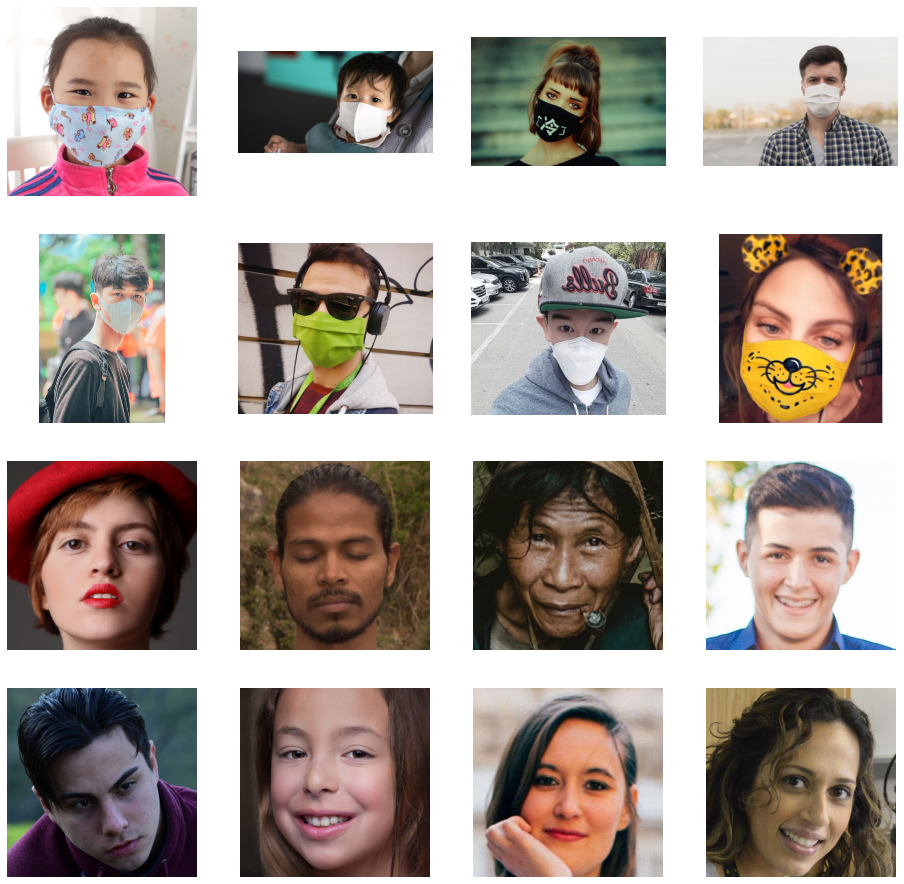

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_mask_pix = [os.path.join(train_mask_dir, fname) 
                for fname in train_mask_names[pic_index-8:pic_index]]
next_nonmask_pix = [os.path.join(train_nonmask_dir, fname) 
                for fname in train_nonmask_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_mask_pix+next_nonmask_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Building CNN Model

In [8]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

#Image Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.3,
                                   rotation_range = 35,
                                   horizontal_flip = True
                                   )
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_folder,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

validation_generator = validation_datagen.flow_from_directory(validation_folder,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 700 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


#Training

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=15,
                    epochs = 50,
                    validation_data = validation_generator)

Epoch 1/50
15/15 [==============================] - 160s 11s/step - loss: 0.9961 - accuracy: 0.5168 - val_loss: 0.6548 - val_accuracy: 0.5458
Epoch 2/50
15/15 [==============================] - 41s 3s/step - loss: 0.5624 - accuracy: 0.7815 - val_loss: 0.4551 - val_accuracy: 0.7451
Epoch 3/50
15/15 [==============================] - 26s 2s/step - loss: 0.3544 - accuracy: 0.8782 - val_loss: 0.3857 - val_accuracy: 0.8431
Epoch 4/50
15/15 [==============================] - 25s 2s/step - loss: 0.3572 - accuracy: 0.8529 - val_loss: 0.2921 - val_accuracy: 0.9020
Epoch 5/50
15/15 [==============================] - 25s 2s/step - loss: 0.3244 - accuracy: 0.8929 - val_loss: 0.2835 - val_accuracy: 0.8954
Epoch 6/50
15/15 [==============================] - 24s 2s/step - loss: 0.2856 - accuracy: 0.8803 - val_loss: 0.2788 - val_accuracy: 0.9020
Epoch 7/50
15/15 [==============================] - 25s 2s/step - loss: 0.2551 - accuracy: 0.9083 - val_loss: 0.2901 - val_accuracy: 0.8922
Epoch 8/50
15/15 [

#Running the Model

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is not using mask")
  else:
    print(fn + " is using mask")

Saving with_mask_8.jpg to with_mask_8.jpg
[3.5478283e-09]
with_mask_8.jpg is using mask


#Training Plot

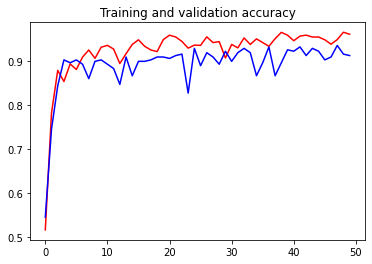

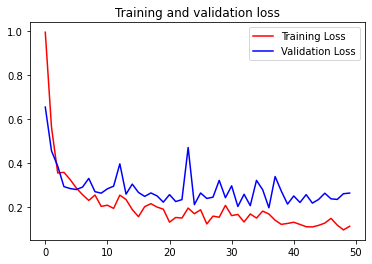

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Mask Detection/Mask_detection.h5')